In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option('display.max_colwidth', 1000)

In [19]:
data = pd.read_excel("E:\\DS Files\\tools\\NLP\\WIPRO sentiment analysis\\Wipro Linkeidn comments.xlsx")
data.head(60)

,Name,Profile image,Comment,Status,Time commented,Connection degree,Tag line,Profile link,Page url
0,Abhishek AnandView Abhishek Anandâ€™s profile,https://media.licdn.com/dms/image/D4D03AQGlHqJSm_EQlg/profile-displayphoto-shrink_100_100/0/1669439114245?e=1708560000&v=beta&t=QcYZgc5wFAo01XrNZZq_ERRgTBmXVrT6zK5ClQvbRys,"I got offer letter in April 2022 from Wipro,but till I didn't receive updates about joining Wipro Wipro Limited",Negative,5mo,(He/Him) â€¢ 2nd,Business Analyst||SQL||POWER BI|| Data Visualization||Advance Excel||Data Studio,https://www.linkedin.com/in/ACoAACtHr9gBzg6cP3_vxOcXEpfcEsClDf55P-k,https://www.linkedin.com/posts/wipro_onewipro-ambitionsrealized-activity-7089129620775596032-Psvt/?utm_source=share&utm_medium=member_desktop
1,Ashish KhannaView Ashish Khannaâ€™s profile,https://media.licdn.com/dms/image/D4D03AQFD-iqLDb-0hg/profile-displayphoto-shrink_100_100/0/1695018818199?e=1708560000&v=beta&t=dwU9sbHPOtfGVH9DuV9STJadMAYryjuyBjfc1uGDZxw,@NIA_India @PMOIndia R&AW ex-agent Rajendra Kapoor+ISI network à¤ªà¥ˆà¤¸à¥‡ à¤²à¥‡à¤•à¤° Voodoo+Freq à¤¸à¥‡ à¤¹à¤®à¤²à¤¾ à¤•à¤° à¤°à¤¹à¤¾ à¤¹à¥ˆ à¤‡à¤¸à¤®à¥‡ Wipro emp Mohammed Muzammil à¤—à¤¿à¤°à¥‹à¤¹ à¤­à¥€ à¤¹à¥ˆà¥¤à¤®à¥à¤à¥‡&à¤®à¥‡à¤°à¥‡ à¤®à¤¾à¤¤à¤,Spam,2mo,â€¢ 3rd+,Software Engineer at Unemployed at this time,https://www.linkedin.com/in/ACoAADfbQxUBig0bLSZPZf1Jn3XcN0nKfluEqJU,https://www.linkedin.com/posts/wipro_onewipro-ambitionsrealized-activity-7089129620775596032-Psvt/?utm_source=share&utm_medium=member_desktop
2,DataSirpi,https://media.licdn.com/dms/image/C560BAQGgjtafQlcMVw/company-logo_100_100/0/1676621375480/datasirpi_private_limited_logo?e=1711584000&v=beta&t=Ut2AZNR2BCKNXQTJqrNrD2EKSR2YJXZyf-3XE6OHJy0,Congratulations to the new batch of graduates at Wipro! ðŸŽ“ðŸŽ‰ It's heartening to see them being welcomed with such a comprehensive induction program. Meeting senior leaders and learning about the company culture will undoubtedly help them integrate smoothly into the Wipro family.The emphasis on bonding with each other during the induction is fantastic! Building strong connections within the team fosters collaboration and a supportive work environment. It's a crucial aspect of personal and professional growth.DataSirpi,Positive,5mo,NaN,"5,184 followers",https://www.linkedin.com/company/datasirpi-private-limited/,https://www.linkedin.com/posts/wipro_onewipro-ambitionsrealized-activity-7089129620775596032-Psvt/?utm_source=share&utm_medium=member_desktop
3,CloudSpikes MultiCloud Solutions Inc.,https://media.licdn.com/dms/image/C560BAQFUj8ejyg5zRA/company-logo_100_100/0/1678912258395?e=1711584000&v=beta&t=eIEIbT-CDDS2CoDHvphVyYxoZppe0RA8Rc0JkwvUq9w,"Congratulations to the newest colleagues at Wipro! ðŸŽ‰ðŸŽ“ It's fantastic to see them welcomed with such a positive and enriching induction experience. Meeting senior leaders, understanding Wipro culture, and bonding with fellow graduates sets the stage for a successful journey ahead. Wishing them all the best as they embark on their careers and make valuable contributions to the company's growth. Here's to a bright and prosperous future for each one of them!",Positive,5mo,NaN,"4,700 followers",https://www.linkedin.com/company/cloudspikes-multicloud-solutions-inc/,https://www.linkedin.com/posts/wipro_onewipro-ambitionsrealized-activity-7089129620775596032-Psvt/?utm_source=share&utm_medium=member_desktop
4,Ashish KhannaView Ashish Khannaâ€™s profile,https://media.licdn.com/dms/image/D4D03AQFD-iqLDb-0hg/profile-displayphoto-shrink_100_100/0/1695018818199?e=1708560000&v=beta&t=dwU9sbHPOtfGVH9DuV9STJadMAYryjuyBjfc1uGDZxw,@PMOIndia à¤®à¥ˆà¤‚ à¤¥à¥‚à¤•à¤¤à¤¾ à¤¹à¥‚à¤ Yasmeen Premji à¤ªà¤°à¥¤ R&AW+ISI agent à¤”à¤° Wipro employee Mohammed Muzammil à¤—à¤¿à¤°à¥‹à¤¹ Voodoo & R&AW+ISI à¤•à¥€ Frequency & EMF radiation à¤¸à¥‡ à¤®à¥‡à¤°à¥€ à¤®à¤¾à¤¤à¤¾ à¤œà¥€ à¤•à¥‹ à¤¬à¥€à¤®à¤¾à¤°,Spam,2mo,â€¢ 3rd+,Software Engineer at Unemployed at this time,https://www.linkedin.com/in/ACoAADfbQxUBig0bLSZPZf1Jn3XcN0nKfluEqJU,https://www.linked

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               66 non-null     object
 1   Profile image      66 non-null     object
 2   Comment            66 non-null     object
 3   Status             66 non-null     object
 4   Time commented     66 non-null     object
 5   Connection degree  64 non-null     object
 6   Tag line           66 non-null     object
 7   Profile link       66 non-null     object
 8   Page url           66 non-null     object
dtypes: object(9)
memory usage: 4.8+ KB


In [5]:
data['Comment'].describe() #just understaning the descriptive statistics 

count        66
unique       62
top       Great
freq          3
Name: Comment, dtype: object

# Data cleaning 

In [6]:
data.Comment=data['Comment'].str.replace(r'[\d]+', '', regex=True) # removing digits
data['Comment'] = data['Comment'].str.replace(r'https?://\S+', '', regex=True) #removing links 
data.Comment=data.Comment.astype('str') #converting to string
data.Comment=data.Comment.str.lower() #converting to lower
data.Comment=data['Comment'].str.replace(r'[^\w\s]+', '', regex=True) #Removing special characters
data.Comment = data['Comment'].apply(lambda x: ''.join(char for char in x if ord(char) < 128)) #removing no asci characters
data.Comment= data['Comment'].apply(lambda x: ' '.join(x.split())) #removing mutiple spaces 
mask = (data['Comment'].str.strip() == '') #check's if the string is empty or contains only white sapce
data.loc[mask, 'Comment'] = None #checks the values to matched rows 
# Check for nulls again
null_count_after_fix = data['Comment'].isnull().sum() #checks for null again 
data = data.dropna(subset=['Comment'])

# Data Visualization

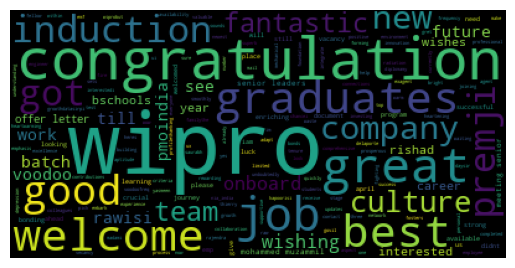

In [7]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(" ".join(data['Comment']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Distribution of Statuses in Data')

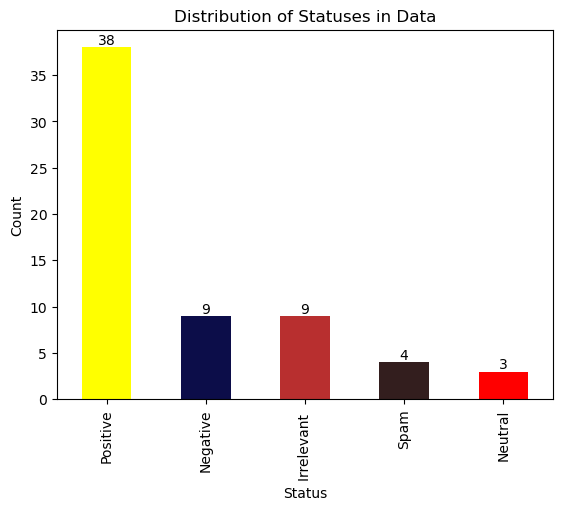

In [8]:
counts = data["Status"].value_counts().plot(kind='bar', color=['yellow', '#0c0d49', '#b82f2f', '#331e1e', 'red', '#00fff7'])

# Add count labels above the bars
for p in counts.patches:
    counts.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Customize the plot (optional)
plt.xlabel("Status")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis
plt.title("Distribution of Statuses in Data") 

# Analysis Sentiment 

In [9]:
from textblob import TextBlob

In [10]:
data['sentiment_textblob'] = data['Comment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [11]:
# Assuming 'data' is your DataFrame
data['Sentiment'] = ''
data['Sentiment Polarity'] = 0.0

for index, row in data.iterrows():
    comment = row['Comment']
    sentiment = TextBlob(comment).sentiment
    data.at[index, 'Sentiment'] = 'Positive' if sentiment.polarity > 0 else 'Negative' if sentiment.polarity < 0 else 'Neutral'
    data.at[index, 'Sentiment Polarity'] = sentiment.polarity

# Enable text wrapping within cells for better readability
from IPython.display import display, HTML

# Display the DataFrame in a tabular format
display(HTML(data[['Comment', 'Sentiment', 'Sentiment Polarity']].to_html(escape=False)))

,Comment,Sentiment,Sentiment Polarity
0,i got offer letter in april from wiprobut till i didnt receive updates about joining wipro wipro limited,Negative,-0.071429
1,nia_india pmoindia raw exagent rajendra kapoorisi network voodoofreq wipro emp mohammed muzammil,Negative,-0.230769
2,congratulations to the new batch of graduates at wipro its heartening to see them being welcomed with such a comprehensive induction program meeting senior leaders and learning about the company culture will undoubtedly help them integrate smoothly into the wipro familythe emphasis on bonding with each other during the induction is fantastic building strong connections within the team fosters collaboration and a supportive work environment its a crucial aspect of personal and professional growthdatasirpi,Positive,0.184470
3,congratulations to the newest colleagues at wipro its fantastic to see them welcomed with such a positive and enriching induction experience meeting senior leaders understanding wipro culture and bonding with fellow graduates sets the stage for a successful journey ahead wishing them all the best as they embark on their careers and make valuable contributions to the companys growth heres to a bright and prosperous future for each one of them,Positive,0.439610
4,pmoindia yasmeen premji rawisi agent wipro employee mohammed muzammil voodoo rawisi frequency emf radiation,Neutral,0.000000
5,great,Positive,0.800000
6,good,Positive,0.700000
7,great,Positive,0.800000
8,great,Positive,0.800000
9,superb great,Positive,0.900000


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create a sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming 'data' is your DataFrame
data['Sentiment'] = ''
data['Sentiment Polarity'] = 0.0

for index, row in data.iterrows():
    comment = row['Comment']
    
    # Use VADER sentiment analysis
    compound_score = analyzer.polarity_scores(comment)['compound']
    
    # Assign sentiment label based on compound score
    sentiment_label = 'Positive' if compound_score > 0 else 'Negative' if compound_score < 0 else 'Neutral'
    
    data.at[index, 'Sentiment'] = sentiment_label
    data.at[index, 'Sentiment Polarity'] = compound_score

# Enable text wrapping within cells for better readability
from IPython.display import display, HTML

# Display the DataFrame in a tabular format
display(HTML(data[['Comment', 'Sentiment', 'Sentiment Polarity']].to_html(escape=False)))

,Comment,Sentiment,Sentiment Polarity
0,i got offer letter in april from wiprobut till i didnt receive updates about joining wipro wipro limited,Negative,-0.2263
1,nia_india pmoindia raw exagent rajendra kapoorisi network voodoofreq wipro emp mohammed muzammil,Neutral,0.0000
2,congratulations to the new batch of graduates at wipro its heartening to see them being welcomed with such a comprehensive induction program meeting senior leaders and learning about the company culture will undoubtedly help them integrate smoothly into the wipro familythe emphasis on bonding with each other during the induction is fantastic building strong connections within the team fosters collaboration and a supportive work environment its a crucial aspect of personal and professional growthdatasirpi,Positive,0.9590
3,congratulations to the newest colleagues at wipro its fantastic to see them welcomed with such a positive and enriching induction experience meeting senior leaders understanding wipro culture and bonding with fellow graduates sets the stage for a successful journey ahead wishing them all the best as they embark on their careers and make valuable contributions to the companys growth heres to a bright and prosperous future for each one of them,Positive,0.9873
4,pmoindia yasmeen premji rawisi agent wipro employee mohammed muzammil voodoo rawisi frequency emf radiation,Neutral,0.0000
5,great,Positive,0.6249
6,good,Positive,0.4404
7,great,Positive,0.6249
8,great,Positive,0.6249
9,superb great,Positive,0.8481


# Text_pre_processing 

In [13]:
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(data['Comment'])

In [14]:
y=data['Status']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [16]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Assuming you have X_train_and_val and y_train_and_val

# Specify the target number of samples for each class
target_samples = 100

# Compute the desired sampling strategy
sampling_strategy = {label: target_samples for label in set(y_train)}

# Print class distribution before oversampling
print("Class distribution before oversampling:", Counter(y_train))

# Initialize RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Print class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

Class distribution before oversampling: Counter({'Positive': 28, 'Negative': 7, 'Irrelevant ': 7, 'Spam': 3, 'Neutral': 2})
Class distribution after oversampling: Counter({'Positive': 100, 'Negative': 100, 'Irrelevant ': 100, 'Spam': 100, 'Neutral': 100})


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have X and y as your features and labels

rf_model = RandomForestClassifier(class_weight='balanced',random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}


grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)


# Step 5: Get the best model and evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Best Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 50}
Best Model Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

 Irrelevant        0.67      1.00      0.80         2
    Negative       1.00      0.50      0.67         2
     Neutral       0.00      0.00      0.00         1
    Positive       0.83      1.00      0.91        10
        Spam       0.00      0.00      0.00         1

    accuracy                           0.81        16
   macro avg       0.50      0.50      0.48        16
weighted avg       0.73      0.81      0.75        16



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Assuming 'best_model' is your trained RandomForestClassifier

# Step 1: Get probability scores for each class
y_prob = best_model.predict_proba(X_test)

# Step 2: Calculate the overall ROC AUC score
overall_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print(f"Overall ROC AUC Score: {overall_auc:.2f}")

Overall ROC AUC Score: 0.89


In [31]:
def pal(text):
    palindrome = []
    for i in range (len(text)):
        for j in range(i+1,len(text)+1):
            substring = text[i:j]
            if substring == substring[::-1] and substring not in palindrome: 
                palindrome.append(substring)       
    palindrome.sort(key=len,reverse = True)
    return palindrome[:4]
            
text='aaaabbaa'
palindrome = pal(text)
print(palindrome)

['aabbaa', 'aaaa', 'abba', 'aaa']
